# 데이터 출처
* Pima Indians 당뇨병 데이터셋(Pima Indians Diabetes Database)
* 캐글 URL : https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

## 데이터 구성
* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.

# 필요한 라이브러리 로드

In [1]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 데이터셋 로드

In [2]:
df = pd.read_csv("diabetes_feature.csv")
df.shape

(768, 16)

In [3]:
df_insulin = pd.read_csv("diabetes_fill_insulin.csv")
df["Insulin"] = df_insulin["Insulin"]

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high,Age_low,Age_middle,Age_high,Insulin_nan,Insulin_log,low_glu_insulin
0,6,148,72,35,186.469417,33.6,0.627,50,1,False,False,True,False,169.5,5.138735,False
1,1,85,66,29,58.633975,26.6,0.351,31,0,False,False,True,False,102.5,4.639572,True
2,8,183,64,0,189.125418,23.3,0.672,32,1,True,False,True,False,169.5,5.138735,False
3,1,89,66,23,94.000000,28.1,0.167,21,0,False,True,False,False,94.0,4.553877,True
4,0,137,40,35,168.000000,43.1,2.288,33,1,False,False,True,False,168.0,5.129899,False


# 학습과 예측에 사용할 데이터셋 만들기

In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_high',
       'Age_low', 'Age_middle', 'Age_high', 'Insulin_nan', 'Insulin_log',
       'low_glu_insulin'],
      dtype='object')

In [6]:
X = df[['Glucose', 'BloodPressure', 'SkinThickness',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Pregnancies_high',
       'Insulin']]
X.shape

(768, 8)

In [7]:
y = df["Outcome"]
y.shape

(768,)

In [8]:
# 사이킷런에서 제공하는 model_selection의 train_test_split으로 만들기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.2, random_state=42)

In [9]:
# train 세트의 문제와 정답 데이터 수를 확인
X_train.shape, y_train.shape

((614, 8), (614,))

In [10]:
# test 세트의 문제와 정답 데이터 수를 확인
X_test.shape, y_test.shape

((154, 8), (154,))

# 머신러닝 알고리즘 사용하기

## DecisionTreeClassifier

In [11]:
from sklearn.tree import DecisionTreeClassifier

# model = DecisionTreeClassifier(random_state=42)
# model

## Bagging(RandomForestClassifier)

In [28]:
# from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(n_estimators=100, random_state=42)

## Boosting

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model

GradientBoostingClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

max_depth = np.random.randint(2,20,10)
max_features = np.random.uniform(0.3, 1.0, 10)

param_distributions = {"max_depth":max_depth, "max_features":max_features}


clf = RandomizedSearchCV(estimator, param_distributions, n_iter=10, 
                   scoring="accuracy", n_jobs=-1, cv=5, verbose=2)

clf.fit(X_train, y_train)
    

In [34]:
clf.best_params_

{'max_features': 0.857465225895093, 'max_depth': 4}

In [35]:
clf.best_score_

0.8681060908969747

## 여러 개의 알고리즘 사용해서 비교하기

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

estimators = [DecisionTreeClassifier(random_state=42),
             RandomForestClassifier(random_state=42),
             GradientBoostingClassifier(random_state=42)]
estimators

[DecisionTreeClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 GradientBoostingClassifier(random_state=42)]

In [13]:
from sklearn.model_selection import RandomizedSearchCV

max_depth = np.random.randint(2,20,10)
max_features = np.random.uniform(0.4, 1.0, 10)

param_distributions = {"max_depth":max_depth, "max_features":max_features}

results = []
for estimator in estimators:
    result = []
    if estimator.__class__.__name__ != 'DecisionTreeClassifier':
        param_distributions["n_estimators"] = np.random.randint(100, 200, 10)
    clf = RandomizedSearchCV(estimator, param_distributions, n_iter=100, 
                       scoring="accuracy", n_jobs=-1, cv=5, verbose=2)

    clf.fit(X_train, y_train)
    
    result.append(estimator.__class__.__name__)
    result.append(clf.best_params_)
    result.append(clf.best_score_) # train dataset에서의 점수
    result.append(clf.score(X_test, y_test)) # test dataset에서의 점수
    result.append(clf.cv_results_)

    results.append(result)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [14]:
result_df = pd.DataFrame(results, columns = ["estimator", "best_params", "train_score",
                                "test_score", "cv_result"])
result_df

,estimator,best_params,train_score,test_score,cv_result
0,DecisionTreeClassifier,"{'max_features': 0.9854488471695854, 'max_dept...",0.768799,0.727273,"{'mean_fit_time': [0.010255527496337891, 0.010..."
1,RandomForestClassifier,"{'n_estimators': 167, 'max_features': 0.449858...",0.793176,0.746753,"{'mean_fit_time': [0.9196399688720703, 1.34132..."
2,GradientBoostingClassifier,"{'n_estimators': 109, 'max_features': 0.704265...",0.788285,0.753247,"{'mean_fit_time': [1.3540307998657226, 0.19894..."


In [62]:
# RandomForestClassifier 결과 자세히 보기
pd.DataFrame(result_df.loc[1, "cv_result"]).sort_values(by="rank_test_score").head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
50,0.390568,0.008669,0.022217,0.002535,176,0.584745,10,"{'n_estimators': 176, 'max_features': 0.584744...",0.886179,0.934959,0.861789,0.902439,0.942623,0.905598,0.030131,1
45,0.363874,0.004624,0.017921,0.002045,154,0.795376,7,"{'n_estimators': 154, 'max_features': 0.795376...",0.886179,0.951220,0.869919,0.894309,0.926230,0.905571,0.029273,2
10,0.391667,0.005677,0.024800,0.001470,176,0.62476,12,"{'n_estimators': 176, 'max_features': 0.624759...",0.878049,0.934959,0.853659,0.902439,0.950820,0.903985,0.035667,3
65,0.235249,0.006036,0.016399,0.001744,106,0.614767,14,"{'n_estimators': 106, 'max_features': 0.614766...",0.886179,0.934959,0.861789,0.894309,0.942623,0.903972,0.030475,4
61,0.433679,0.005572,0.027008,0.002393,193,0.571894,14,"{'n_estimators': 193, 'max_features': 0.571894...",0.878049,0.934959,0.861789,0.902439,0.942623,0.903972,0.031330,4


# 학습과 예측하기

In [17]:
# 학습시키기
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [18]:
model.feature_importances_

array([1.06409948e-01, 7.04053663e-03, 6.57236021e-02, 3.73742490e-02,
       2.62954875e-02, 9.47259928e-02, 1.56708089e-04, 6.62273475e-01,
       0.00000000e+00])

<AxesSubplot:>

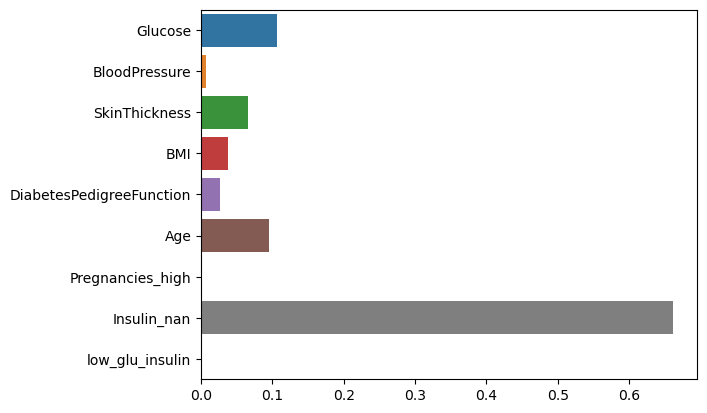

In [19]:
feature_names = X_train.columns.tolist()
sns.barplot(x=model.feature_importances_, y=feature_names)

In [20]:
# 예측하고 결과를 y_predict에 담는다.
y_predict = model.predict(X_test)
y_predict

array([1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

# 정확도 측정하기

In [21]:
# 다르게 예측한 개수 구해서 diff_count에 할당
# DecisionTreeClassifier : 28개
# RandomForestClassifier : 20개
# GradientBoostingClassifier : 24개
diff_count = (y_predict != y_test).sum() 
diff_count

24

In [22]:
# accuracy score 구하기
from sklearn.metrics import accuracy_score

# DecisionTreeClassifier : 0.8181818181818182
# RandomForestClassifier : 0.8701298701298701
# GradientBoostingClassifier : 0.8441558441558441

accuracy_score(y_test, y_predict)

0.8441558441558441